Text(0, 0.5, '총 사망자')

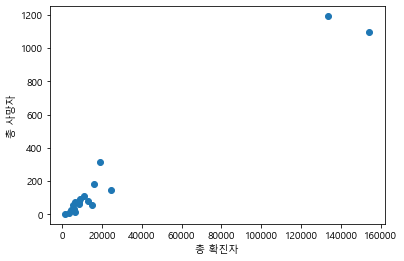

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import numpy as np
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

data = pd.read_csv('C:\\Users\\ksk03\\PycharmProjects\\Web\\data_df.csv',sep=',', thousands=',')
x = data['총 확진자']
y = data['총 사망자']
plt.plot(x,y,'o')
plt.xlabel('총 확진자')
plt.ylabel('총 사망자')


12 6


Text(0, 0.5, '총 사망자')

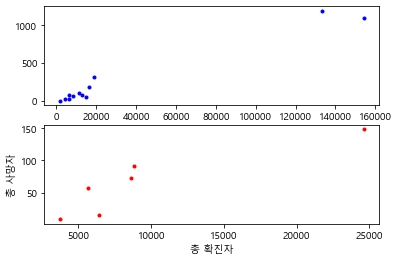

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)
print(len(x_train),len(x_test))
fig, axes = plt.subplots(2, 1)
axes[0].plot(x_train,y_train,'b.')
axes[1].plot(x_test,y_test,'r.')

In [24]:
linearfitter = LinearRegression()
linearfitter.fit(x_train.values.reshape(-1,1),y_train)
[linearfitter.coef_,linearfitter.intercept_]

[array([0.00783307]), 14.936028332182815]

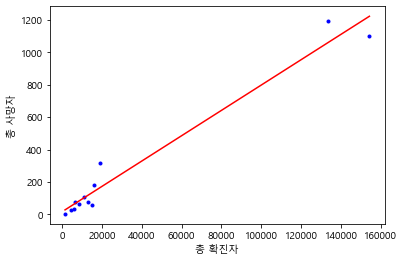

In [25]:
f = lambda x: linearfitter.intercept_ + (linearfitter.coef_*x)
x=np.array([min(x_train),max(x_train)])
plt.plot(x_train, y_train, 'b.')
plt.xlabel('총 확진자')
plt.ylabel('총 사망자')
plt.plot(x, f(x), color = 'r')

In [27]:
linearfitter.score(x_train.values.reshape(-1,1),y_train)

0.9650152457988525

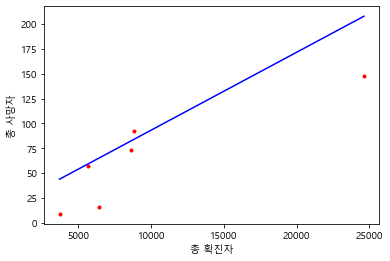

In [28]:
x = np.array([min(x_test), max(x_test)])
plt.plot(x_test, y_test, '.', color ='r')
plt.xlabel('총 확진자')
plt.ylabel('총 사망자')
plt.plot(x, f(x), color = 'blue')

In [29]:
linearfitter.score(x_test.values.reshape(-1,1),y_test)

0.4429561099900412

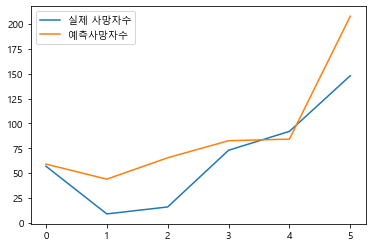

In [32]:
plt.plot(y_test.values.reshape(-1, 1), label="실제 사망자수")
plt.plot(linearfitter.predict(x_test.values.reshape(-1,1)), label="예측사망자수")
plt.legend()